# Άσκηση 1

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import random

from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import MDS

In [73]:
# Deactivate warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Πρέπει να κάνουμε upload το αρχείο seeds_dataset.txt στο colab.

In [74]:
!ls

City_names_US.txt     Distance_Matrix_US.txt	 sample_data
City_names_world.txt  Distance_Matrix_world.txt  seeds_dataset.txt


In [75]:
# Read the data into a dataframe, handling variable separators (some features and labels are sifted to the right), features-labels in columns
df = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, header=None)

In [76]:
df.head(10)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [77]:
print("Number of samples is", df.shape[0], "and number of features is", df.shape[1]-1)

Number of samples is 210 and number of features is 7


In [78]:
# Extract features and convert it to a NumPy array
x_data = df.iloc[:, :7].values
# Extract the last column (labels) and convert it to a NumPy array
y_data = df.iloc[:, 7].values

In [79]:
print(x_data.shape)
print(y_data.shape)

(210, 7)
(210,)


In [80]:
# Count samples of each cluster
unique_classes, counts = np.unique(y_data, return_counts=True)

# Display the results
for cluster, count in zip(unique_classes, counts):
    print(f'Class {cluster}: {count} samples')

Class 1: 70 samples
Class 2: 70 samples
Class 3: 70 samples


## 1.A

In [81]:
euclidean_dist_matrix = euclidean_distances(x_data) # Calculate the Euclidean distances using scikit learn
cosine_dist_matrix = 1 - cosine_similarity(x_data) # Calculate the Cosine distances using scikit learn

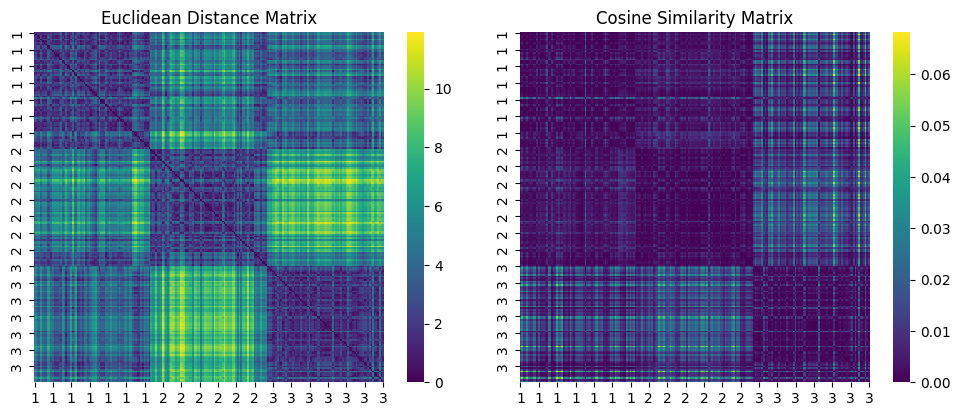

In [82]:
# Create a DataFrame, where rows and columns represent class labels
euclidean_distances_df = pd.DataFrame(euclidean_dist_matrix, index=y_data, columns=y_data)
cosine_similarity_df = pd.DataFrame(cosine_dist_matrix, index=y_data, columns=y_data)

# Create subplots with two heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the Euclidean distance matrix
sns.heatmap(euclidean_distances_df, cmap="viridis", ax=axes[0], square=True)
axes[0].set_title("Euclidean Distance Matrix")

# Plot the cosine similarity matrix
sns.heatmap(cosine_similarity_df, cmap="viridis", ax=axes[1], square=True)
axes[1].set_title("Cosine Similarity Matrix")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [83]:
samples = df.shape[0] # 210

# Calculate Euclidean distance between two vectors
def euclidean_distance(x, y):
  return np.sqrt(np.sum((x - y)**2))

# Calculate Cosine similarity between two vectors
def cosine_similarity(x, y):
  return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

# Initialize distance matrices with zeros, rows and columns are equal to the number of features
euclidean_dist_matrix_with_func = np.zeros((samples, samples))
cosine_dist_matrix_with_func = np.zeros((samples, samples))

# Extract the values of the features from the DataFrame
df_values = df.iloc[:, :samples].values

# Loop through each pair of samples to calculate distance matrices, distances for every pair of samples in the dataset
for i in range(samples):
  for j in range(samples):
    euclidean_dist_matrix_with_func[i, j] = euclidean_distance(x_data[i], x_data[j])
    cosine_dist_matrix_with_func[i, j] = 1 - cosine_similarity(x_data[i], x_data[j])

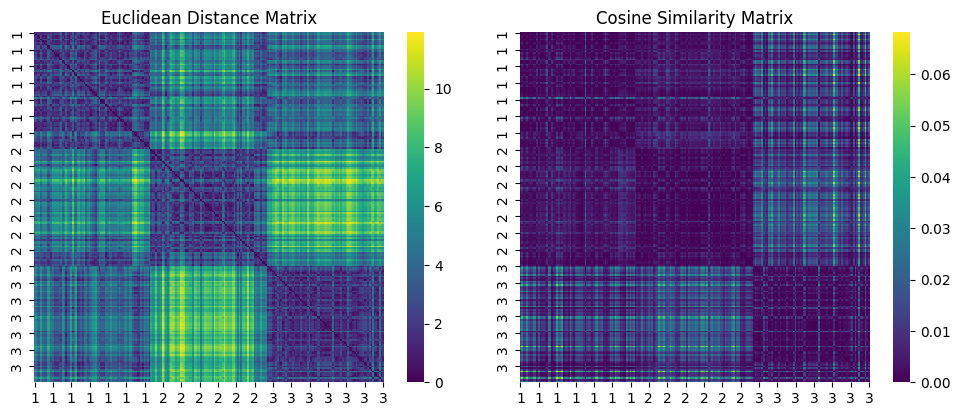

In [84]:
# Create a DataFrame, where rows and columns represent class labels
euclidean_distances_df = pd.DataFrame(euclidean_dist_matrix_with_func, index=y_data, columns=y_data)
cosine_similarity_df = pd.DataFrame(cosine_dist_matrix_with_func, index=y_data, columns=y_data)

# Create subplots with two heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the Euclidean distance matrix
sns.heatmap(euclidean_distances_df, cmap="viridis", ax=axes[0], square=True)
axes[0].set_title("Euclidean Distance Matrix")

# Plot the cosine similarity matrix
sns.heatmap(cosine_similarity_df, cmap="viridis", ax=axes[1], square=True)
axes[1].set_title("Cosine Similarity Matrix")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## 1.B

Silhouette Score for K = 2 is: 0.5194
Silhouette Score for K = 3 is: 0.4719
Silhouette Score for K = 4 is: 0.3965
Silhouette Score for K = 5 is: 0.3593
Silhouette Score for K = 6 is: 0.3659
Silhouette Score for K = 7 is: 0.3507
Silhouette Score for K = 8 is: 0.3625
Silhouette Score for K = 9 is: 0.3576
Silhouette Score for K = 10 is: 0.3675

Max Silhouette Score is 0.5194 for K = 2


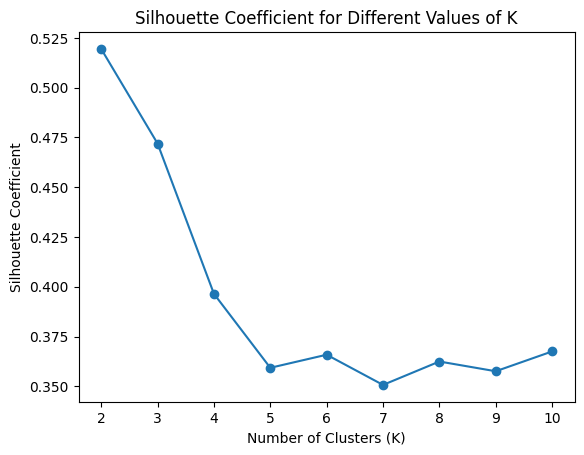

In [85]:
random_seed = 1234
max_class_number = 10
silhouette_scores = []
k_values = []

for k in range(2, max_class_number+1): # for k = 2, 3, .., 10
  # Perform KMeans clustering for k classes using Squared Euclidean distance
  # n_init is the number of times the KMeans algorithm will with different centroid seeds
  kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
  labels = kmeans.fit_predict(x_data) # Find the labels based on the KMeans clustering
  score = silhouette_score(x_data, labels) # Compute silhouette score
  print(f"Silhouette Score for K = {k} is: {round(score, 4)}")
  # Keep scores for each k and values of k in lists, for plots
  silhouette_scores.append(score)
  k_values.append(k)

# Find the value of K with the max silhouette score
max_score_index = silhouette_scores.index(max(silhouette_scores))
max_k = k_values[max_score_index]
print(f"\nMax Silhouette Score is {round(max(silhouette_scores), 4)} for K = {max_k}")

# Plot the silhouette scores for different values of K
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.show()

## 1.Γ

In [86]:
# Calculate mean and standard deviation for each feature
mean_values = np.mean(x_data, axis=0)
std_dev_values = np.std(x_data, axis=0)

# Normalize the data, mean = 0 and std = 1 for every feature
x_normalized = (x_data - mean_values) / std_dev_values

Silhouette Score for K = 2 is: 0.4658
Silhouette Score for K = 3 is: 0.4007
Silhouette Score for K = 4 is: 0.3276
Silhouette Score for K = 5 is: 0.2834
Silhouette Score for K = 6 is: 0.289
Silhouette Score for K = 7 is: 0.287
Silhouette Score for K = 8 is: 0.2542
Silhouette Score for K = 9 is: 0.2564
Silhouette Score for K = 10 is: 0.2495

Max Silhouette Score is 0.4658 for K = 2


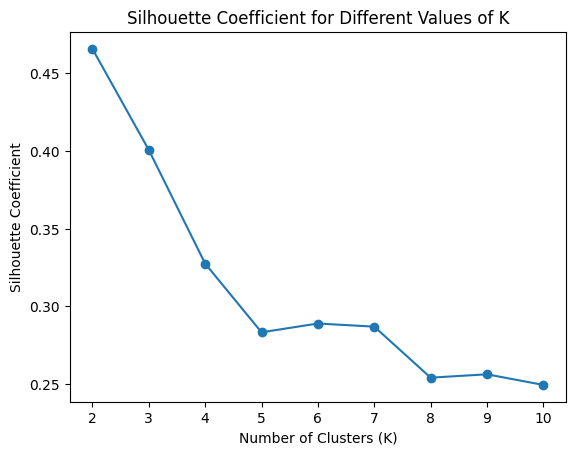

In [87]:
silhouette_scores = []
k_values = []

for k in range(2, max_class_number+1): # for k = 2, 3, .., 10
  # Perform KMeans clustering for k classes using Squared Euclidean distance, using normalized data
  # n_init is the number of times the KMeans algorithm will with different centroid seeds
  kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
  labels = kmeans.fit_predict(x_normalized) # Find the labels based on the KMeans clustering
  score = silhouette_score(x_normalized, labels) # Compute silhouette score
  print(f"Silhouette Score for K = {k} is: {round(score, 4)}")
  # Keep scores for each k and values of k in lists, for plots
  silhouette_scores.append(score)
  k_values.append(k)

# Find the value of K with the max silhouette score
max_score_index = silhouette_scores.index(max(silhouette_scores))
max_k = k_values[max_score_index]
print(f"\nMax Silhouette Score is {round(max(silhouette_scores), 4)} for K = {max_k}")

# Plot the silhouette scores for different values of K
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.show()

Silhouette Score for K = 2 is: 0.699
Silhouette Score for K = 3 is: 0.5215
Silhouette Score for K = 4 is: 0.5252
Silhouette Score for K = 5 is: 0.5501
Silhouette Score for K = 6 is: 0.5328
Silhouette Score for K = 7 is: 0.5293
Silhouette Score for K = 8 is: 0.5156
Silhouette Score for K = 9 is: 0.537
Silhouette Score for K = 10 is: 0.5347

Max Silhouette Score is 0.699 for K = 2


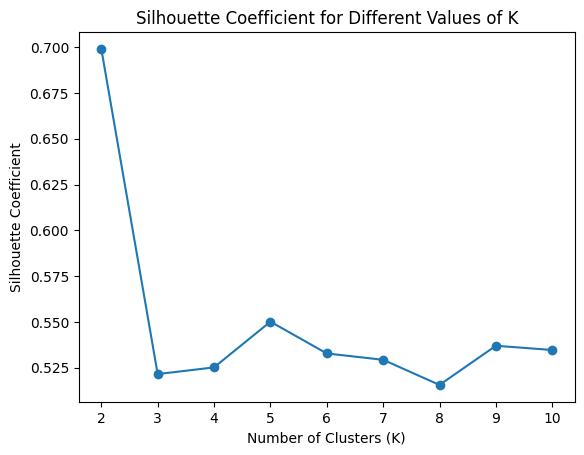

In [88]:
length = np.sqrt((x_data**2).sum(axis=1))[:,None]
Xn = (x_data)/length

silhouette_scores = []
k_values = []

for k in range(2, max_class_number+1): # for k = 2, 3, .., 10
  # Perform KMeans clustering for k classes using "cosine" distance, using initial data
  # n_init is the number of times the KMeans algorithm will with different centroid seeds
  kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
  labels = kmeans.fit_predict(Xn) # Find the labels based on the KMeans clustering
  score = silhouette_score(Xn, labels, metric='cosine') # Compute silhouette score for cosine metric
  print(f"Silhouette Score for K = {k} is: {round(score, 4)}")

  # Keep scores for each k and values of k in lists, for plots
  silhouette_scores.append(score)
  k_values.append(k)

# Find the value of K with the max silhouette score
max_score_index = silhouette_scores.index(max(silhouette_scores))
max_k = k_values[max_score_index]
print(f"\nMax Silhouette Score is {round(max(silhouette_scores), 4)} for K = {max_k}")

# Plot the silhouette scores for different values of K
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.show()

Silhouette Score for K = 2 is: 0.6661
Silhouette Score for K = 3 is: 0.683
Silhouette Score for K = 4 is: 0.612
Silhouette Score for K = 5 is: 0.5897
Silhouette Score for K = 6 is: 0.5807
Silhouette Score for K = 7 is: 0.4542
Silhouette Score for K = 8 is: 0.4583
Silhouette Score for K = 9 is: 0.4369
Silhouette Score for K = 10 is: 0.4584

Max Silhouette Score is 0.683 for K = 3


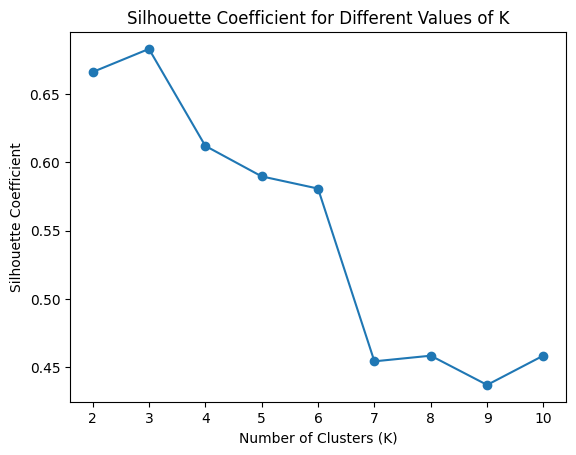

In [89]:
length = np.sqrt((x_normalized**2).sum(axis=1))[:,None]
Xn = (x_normalized)/length

silhouette_scores = []
k_values = []

for k in range(2, max_class_number+1): # for k = 2, 3, .., 10
  # Perform KMeans clustering for k classes using "cosine" distance, using normalized data
  # n_init is the number of times the KMeans algorithm will with different centroid seeds
  kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
  labels = kmeans.fit_predict(Xn) # Find the labels based on the KMeans clustering
  score = silhouette_score(Xn, labels, metric='cosine') # Compute silhouette score for cosine metric
  print(f"Silhouette Score for K = {k} is: {round(score, 4)}")

  # Keep scores for each k and values of k in lists, for plots
  silhouette_scores.append(score)
  k_values.append(k)

# Find the value of K with the max silhouette score
max_score_index = silhouette_scores.index(max(silhouette_scores))
max_k = k_values[max_score_index]
print(f"\nMax Silhouette Score is {round(max(silhouette_scores), 4)} for K = {max_k}")

# Plot the silhouette scores for different values of K
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.show()

## 1.Δ

In [90]:
y_true = y_data-1 # predicted labels from KMeans are 0, 1, 2, we have 1, 2, 3, so we do -1

In [91]:
rand_indices = []

# Perform KMeans clustering for 5 times
for i in range(5):
  kmeans = KMeans(n_clusters=3, random_state=None, n_init=10)
  kmeans.fit(x_data) # Use normalized data
  # Get the predicted labels from the clustering
  labels_pred = kmeans.labels_
  # Store the Rand Index in a list
  rand_index = rand_score(y_true, labels_pred)
  rand_indices.append(rand_index)

# Calculate the mean and variance of Rand Index over multiple runs
mean_rand_index = np.mean(rand_indices)
variance_rand_index = np.var(rand_indices)

print("Mean Rand Index:", round(mean_rand_index, 4))
print("Variance of Rand Index:", variance_rand_index)

Mean Rand Index: 0.8744
Variance of Rand Index: 0.0


## 1.E

In [92]:
rand_indices = []

# Perform KMeans clustering for 5 times
for i in range(5):
  kmeans = KMeans(n_clusters=3, random_state=None, n_init=10)
  kmeans.fit(Xn) # Use the data that are normalized with the length for cosine metric
  # Get the predicted labels from the clustering
  labels_pred = kmeans.labels_
  # Store the Rand Index in a list
  rand_index = rand_score(y_true, labels_pred)
  rand_indices.append(rand_index)

# Calculate the mean and variance of Rand Index over multiple runs
mean_rand_index = np.mean(rand_indices)
variance_rand_index = np.var(rand_indices)

print("Mean Rand Index:", round(mean_rand_index, 4))
print("Variance of Rand Index:", variance_rand_index)

Mean Rand Index: 0.8616
Variance of Rand Index: 0.0


# Άσκηση 2

## 2.B

In [93]:
# Perform hierarchical clustering using Ward method and Euclidean distance
Z = linkage(x_data, method='ward', metric='euclidean')

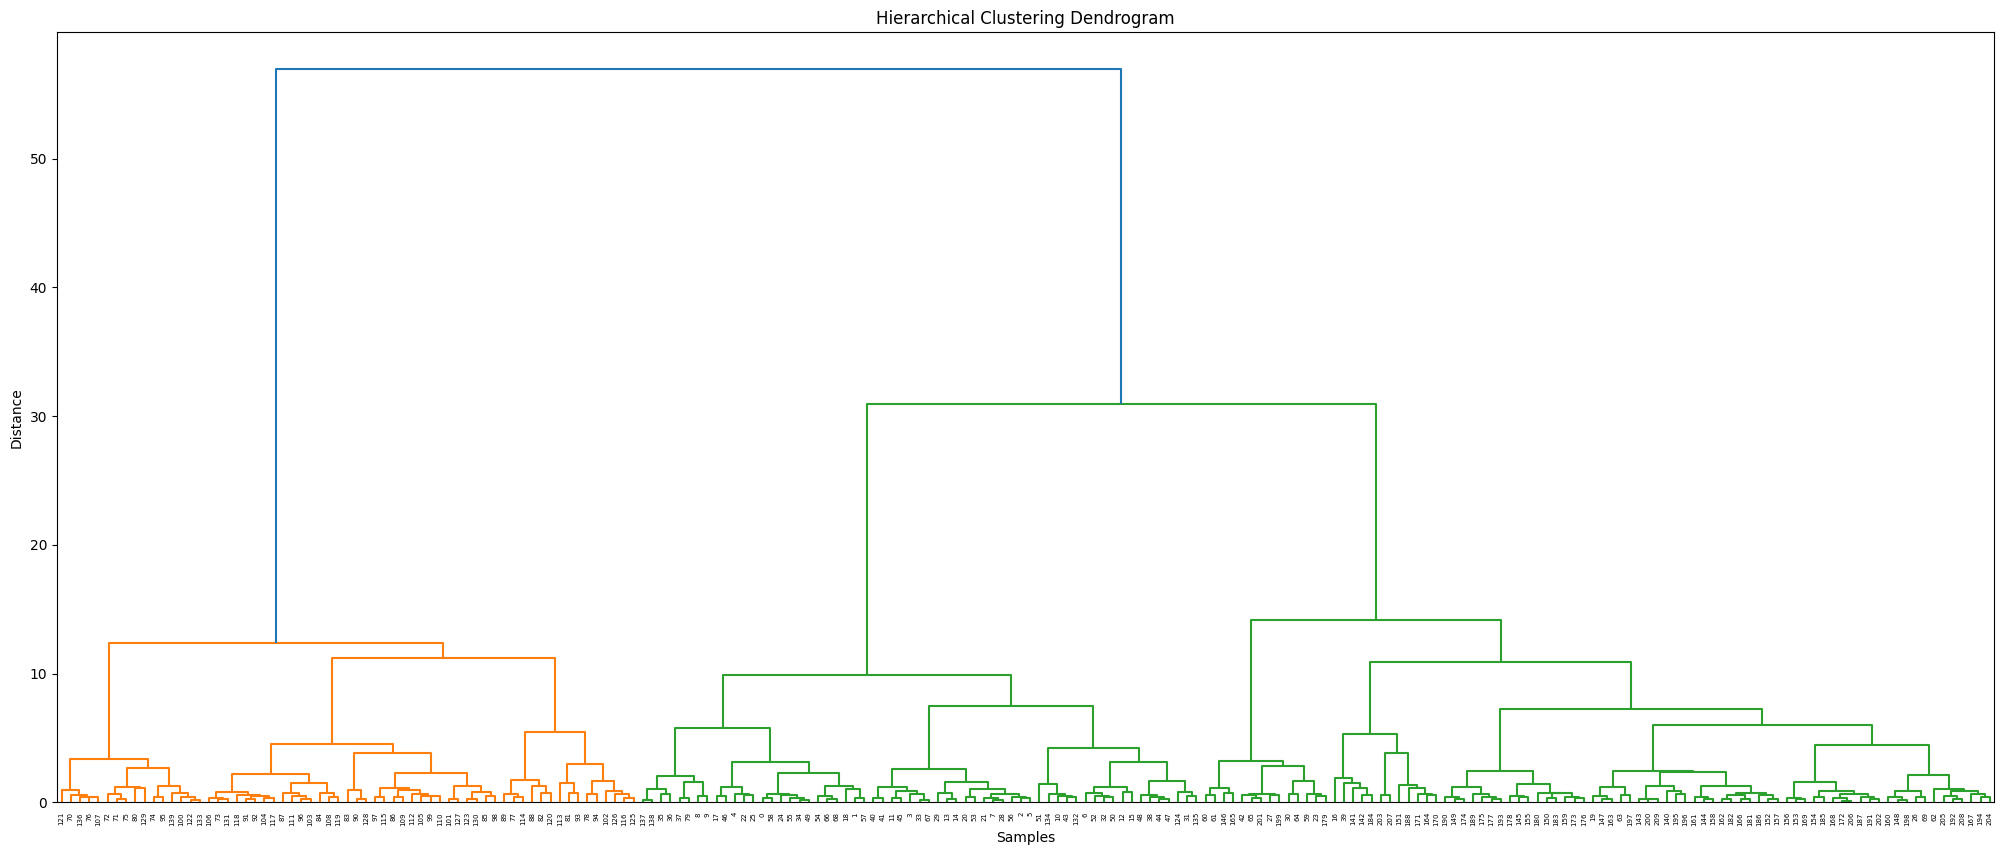

In [94]:
fig = plt.figure(figsize=(25, 10))
# Plot the hierarchical clustering dendrogram
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

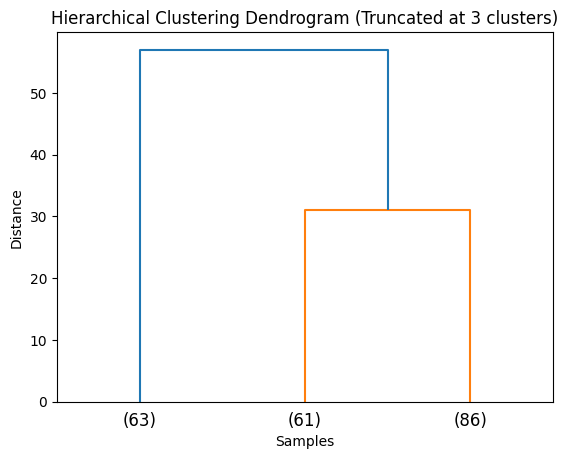

In [95]:
# Plot the hierarchical clustering dendrogram
dendrogram(Z, truncate_mode='lastp', p=3) # I want 3 clusters
plt.title('Hierarchical Clustering Dendrogram (Truncated at 3 clusters)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## 2.Γ

In [96]:
# Perform agglomerative clustering for 3 clusters
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean') #  If linkage is ward, only euclidean metric is accepted
agglomerative.fit(x_data)
labels = agglomerative.labels_ # Get the predicted labels from the clustering
print("Assigned Labels:", labels) # Print the labels after clustering

Assigned Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [97]:
# Compute rand index
rand_index = rand_score(y_true, labels)
print("Rand Index:", round(rand_index, 4))

Rand Index: 0.8723


# Άσκηση 3

## 3.Α

In [98]:
# Perform PCA on the dataset
pca = PCA() # If n_components is not set all components are kept
x_pca = pca.fit_transform(x_data) # Fit the model with x_data and apply the dimensionality reduction on x_data

# Percentage of variance explained by each of the selected components
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio is:\n{explained_variance_ratio}")

Explained Variance Ratio is:
[8.29385197e-01 1.63632452e-01 5.65790880e-03 9.90306086e-04
 2.11180347e-04 1.20677139e-04 2.27879552e-06]


In [99]:
# See the projection matrices, rows are components, columns are features
# Values of the ith row represents the weights of the corresponding original features to the ith principal component
# The max value of the 1st row is in column 1, so the 1st feature, is more important for the 1st principal component
components = pca.components_
print(np.round(components, decimals=3))

[[ 0.884  0.395  0.004  0.129  0.111 -0.128  0.129]
 [ 0.101  0.056 -0.003  0.031  0.002  0.989  0.082]
 [ 0.265 -0.283  0.059 -0.4    0.319  0.064 -0.762]
 [-0.199  0.579 -0.058  0.436 -0.234  0.025 -0.613]
 [-0.137  0.575 -0.053 -0.787 -0.145 -0.002  0.088]
 [ 0.281 -0.302 -0.045 -0.113 -0.896  0.003 -0.11 ]
 [ 0.025 -0.066 -0.994 -0.001  0.082 -0.001 -0.009]]


In [100]:
# Percentage of the cumulative explained variance ratio, total variance explaied by component n and all the previous components
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(f"Cumulative Explained Variance Ratio is:\n{cumulative_explained_variance}")

Cumulative Explained Variance Ratio is:
[0.8293852  0.99301765 0.99867556 0.99966586 0.99987704 0.99999772
 1.        ]


In [101]:
# Find the index of which component can achieve cumulative variance >= 90%, + 1 because list index starts from 0
min_components_90 = np.argmax(cumulative_explained_variance >= 0.9) + 1
# Find the index of which component can achieve cumulative variance >= 99%, + 1 because list index starts from 0
min_components_99 = np.argmax(cumulative_explained_variance >= 0.99) + 1

print(f"To explain 90% of the variance we need at least {min_components_90} principal components.")
print(f"To explain 99% of the variance we need at least {min_components_99} principal components.")

To explain 90% of the variance we need at least 2 principal components.
To explain 99% of the variance we need at least 2 principal components.


## 3.Β

Number of Components: 1, Reconstruction Error: 0.3157
Number of Components: 2, Reconstruction Error: 0.0129
Number of Components: 3, Reconstruction Error: 0.0025
Number of Components: 4, Reconstruction Error: 0.0006
Number of Components: 5, Reconstruction Error: 0.0002
Number of Components: 6, Reconstruction Error: 0.0
Number of Components: 7, Reconstruction Error: 0.0


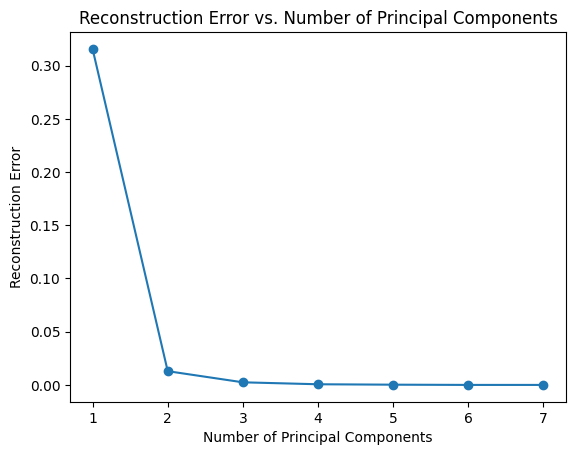

In [102]:
reconstruction_errors = []
n_components = len(explained_variance_ratio) # Max number of principal components

# Loop through different numbers of principal components
for i in range(1, n_components+1):
  pca = PCA(n_components=i) # Perform PCA for i components, only i components are kept
  x_pca = pca.fit_transform(x_data) # Fit the model with x_data and apply the dimensionality reduction on x_data

  # Reconstruct the data, transform data back to its original space
  x_reconstructed = pca.inverse_transform(x_pca)

  # Calculate the reconstruction error
  reconstruction_error = np.mean(np.square(x_data - x_reconstructed))

  # Append the error to the list
  reconstruction_errors.append(reconstruction_error)

# Print the reconstruction errors
for i, error in enumerate(reconstruction_errors, 1):
  print(f"Number of Components: {i}, Reconstruction Error: {round(error, 4)}")

# Plot the reconstruction errors
plt.plot(range(1, n_components+1), reconstruction_errors, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Principal Components')
plt.show()

## 3.Γ

In [103]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_data)

# Perform LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(x_data, y_data)

In [104]:
print("\nLDA Projection Matrix:")
print(lda.scalings_)


LDA Projection Matrix:
[[-4.23778614e-01  4.19531669e+00]
 [ 3.79919995e+00 -8.50579585e+00]
 [ 5.92772810e+00 -8.69823024e+01]
 [-5.98819597e+00 -7.83067468e+00]
 [ 3.70482197e-02  7.14104253e-01]
 [-4.50472160e-02  3.21253808e-01]
 [ 3.11807592e+00  6.91384931e+00]]


In [105]:
# See the projection matrices, rows are components, columns are features
print("PCA Projection Matrix:")
print(pca.components_)

print("\nLDA Projection Matrix:")
print(lda.scalings_.T)

PCA Projection Matrix:
[[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]]

LDA Projection Matrix:
[[-4.23778614e-01  3.79919995e+00  5.92772810e+00 -5.98819597e+00
   3.70482197e-02 -4.50472160e-02  3.11807592e+00]
 [ 4.19531669e+00 -8.50579585e+00 -8.69823024e+01 -7.83067468e+00
   7.14104253e-01  3.21253808e-01  6.91384931e+00]]


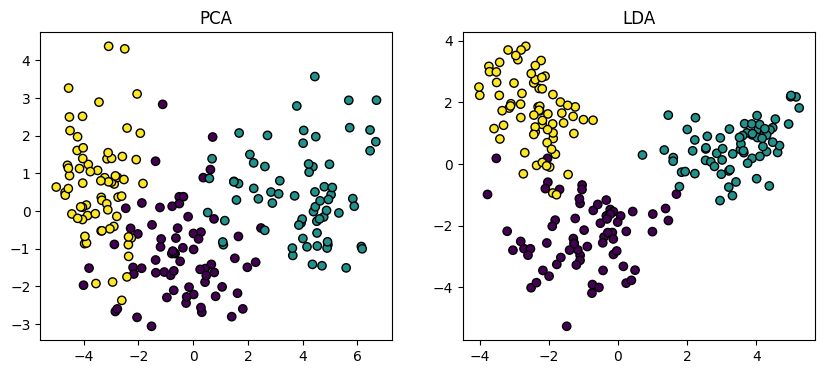

In [106]:
# Visualize PCA result
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_data, cmap='viridis', edgecolor='k')
plt.title('PCA')

# Visualize LDA result
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_data, cmap='viridis', edgecolor='k')
plt.title('LDA')

plt.show()

## 3.Δ

In [107]:
# See the projection matrices, rows are components, columns are features
print("PCA Projection Matrix:")
print(pca.components_)

print("\nLDA Projection Matrix:")
print(lda.scalings_.T)

PCA Projection Matrix:
[[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]]

LDA Projection Matrix:
[[-4.23778614e-01  3.79919995e+00  5.92772810e+00 -5.98819597e+00
   3.70482197e-02 -4.50472160e-02  3.11807592e+00]
 [ 4.19531669e+00 -8.50579585e+00 -8.69823024e+01 -7.83067468e+00
   7.14104253e-01  3.21253808e-01  6.91384931e+00]]


In [108]:
# Iterate over each row for PCA
for i, row in enumerate(pca.components_):
  max_value = np.max(abs(row))
  max_index = np.argmax(abs(row))

  print(f"Maximum value in row {i + 1} is: {round(max_value, 3)}")
  print(f"Most significant feature for principal component {i + 1} is: feature {max_index + 1}\n")

Maximum value in row 1 is: 0.884
Most significant feature for principal component 1 is: feature 1

Maximum value in row 2 is: 0.989
Most significant feature for principal component 2 is: feature 6



In [109]:
# Iterate over each row for LDA
for i, row in enumerate(lda.scalings_.T):
  max_value = np.max(abs(row))
  max_index = np.argmax(abs(row))

  print(f"Maximum value in row {i + 1} is: {round(max_value, 3)}")
  print(f"Most significant feature for class discrimination is: feature {max_index + 1}\n")

Maximum value in row 1 is: 5.988
Most significant feature for class discrimination is: feature 4

Maximum value in row 2 is: 86.982
Most significant feature for class discrimination is: feature 3



In [110]:
# Iterate over each row for LDA
for i, row in enumerate(lda.scalings_.T):
  min_value = np.min(abs(row))
  min_index = np.argmin(abs(row))

  print(f"Minimum value in row {i + 1} is: {round(min_value, 3)}")
  print(f"Less significant feature for class discrimination is: feature {min_index + 1}\n")

Minimum value in row 1 is: 0.037
Less significant feature for class discrimination is: feature 5

Minimum value in row 2 is: 0.321
Less significant feature for class discrimination is: feature 6



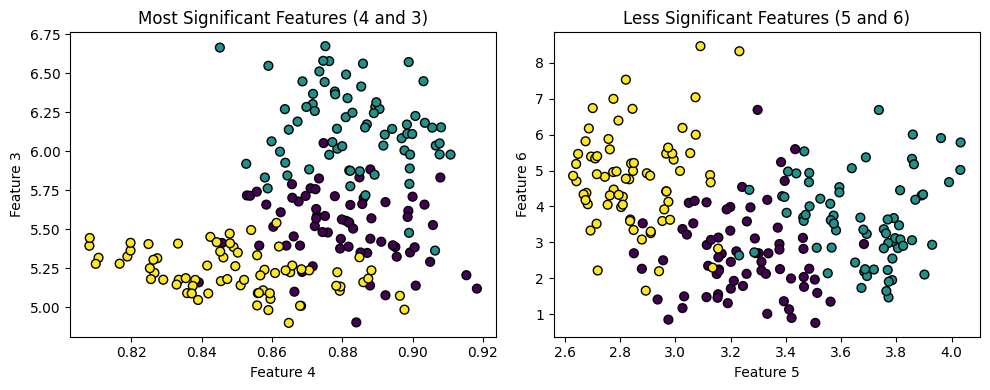

In [111]:
features_high = x_data[:, [2, 3]] # Select features 3 and 4
features_low = x_data[:, [4, 5]] # Select features 5 and 6

# Create scatter plots
plt.figure(figsize=(10, 4))

# Scatter plot for the most significant features
plt.subplot(1, 2, 1)
plt.scatter(features_high[:, 0], features_high[:, 1], c=y_data, cmap='viridis', edgecolor='k', s=40)
plt.title('Most Significant Features (4 and 3)')
plt.xlabel('Feature 4')
plt.ylabel('Feature 3')

# Scatter plot for the less significant features
plt.subplot(1, 2, 2)
plt.scatter(features_low[:, 0], features_low[:, 1], c=y_data, cmap='viridis', edgecolor='k', s=40)
plt.title('Less Significant Features (5 and 6)')
plt.xlabel('Feature 5')
plt.ylabel('Feature 6')

# Show the plots
plt.tight_layout()
plt.show()

# Άσκηση 4

Πρέπει να κάνουμε upload τα αρχεία City_names_US.txt, City_names_world.txt, Distance_Matrix_US.txt, Distance_Matrix_world.txt στο colab.

In [112]:
!ls

City_names_US.txt     Distance_Matrix_US.txt	 sample_data
City_names_world.txt  Distance_Matrix_world.txt  seeds_dataset.txt


In [113]:
# Read names from txt file
with open("City_names_world.txt", "r") as names_file:
  city_names_world = names_file.read().splitlines()
city_names_world

['Berlin',
 'Buenos_Aires',
 'Cairo',
 'Calcutta',
 'Cape_Town',
 'Caracas',
 'Chicago',
 'Hong_Kong',
 'Honolulu',
 'Istanbul',
 'Lisbon',
 'London',
 'Los_Angeles',
 'Manila',
 'Mexico_City',
 'Montreal',
 'Moscow',
 'New_York',
 'Paris',
 'Rio_de_Janeiro',
 'Rome',
 'San_Francisco',
 'Shanghai',
 'Stockholm',
 'Sydney',
 'Tokyo',
 'Warsaw',
 'Washington,_D.C.']

In [114]:
# Read the data into a dataframe, handling variable separators
df = pd.read_csv("Distance_Matrix_world.txt", delim_whitespace=True, header=None)
# Set the city_names_world as both row and column names
df.columns = df.index = city_names_world

In [115]:
df

,Berlin,Buenos_Aires,Cairo,Calcutta,Cape_Town,Caracas,Chicago,Hong_Kong,Honolulu,Istanbul,...,Paris,Rio_de_Janeiro,Rome,San_Francisco,Shanghai,Stockholm,Sydney,Tokyo,Warsaw,"Washington,_D.C."
Berlin,0,7402,1795,4368,5981,5247,4405,5440,7309,1078,...,545,6220,734,5661,5218,504,10006,5540,320,4169
Buenos_Aires,7402,0,7345,10265,4269,3168,5598,11472,7561,7611,...,6870,1200,6929,6467,12201,7808,7330,11408,7662,5218
Cairo,1795,7345,0,3539,4500,6338,6129,5061,8838,768,...,1995,6146,1320,7364,5183,2111,8952,5935,1630,5800
Calcutta,4368,10265,3539,0,6024,9605,7980,1648,7047,3638,...,4883,9377,4482,7814,2117,4195,5685,3194,4048,8084
Cape_Town,5981,4269,4500,6024,0,6365,8494,7375,11534,5154,...,5807,3773,5249,10247,8061,6444,6843,9156,5958,7901
Caracas,5247,3168,6338,9605,6365,0,2501,10167,6013,6048,...,4736,2810,5196,3904,9501,5420,9513,8799,5517,2059
Chicago,4405,5598,6129,7980,8494,2501,0,7793,4250,5477,...,4134,5296,4808,1858,7061,4278,9272,6299,4667,597
Hong_Kong,5440,11472,5061,1648,7375,10167,7793,0,5549,4984,...,5985,11021,5768,6897,764,5113,4584,1794,5144,8147
Honolulu,7309,7561,8838,7047,11534,6013,4250,5549,0,8109,...,7438,8285,8022,2393,4941,6862,4943,3853,7355,4519
Istanbul,1078,7611,768,3638,5154,6048,5477,4984,8109,0,...,1400,6389,843,6703,4962,1348,9294,5560,863,5215


## 4.Α

In [116]:
# Convert pandas dataframe to numpy array
distance_matrix = df.to_numpy()

In [117]:
# Perform MDS for 2 dimensions
mds_2d = MDS(n_components=2, dissimilarity='precomputed', random_state=random_seed)
coordinates_2d = mds_2d.fit_transform(distance_matrix)

# Perform MDS for 3 dimensions
mds_3d = MDS(n_components=3, dissimilarity='precomputed', random_state=random_seed)
coordinates_3d = mds_3d.fit_transform(distance_matrix)

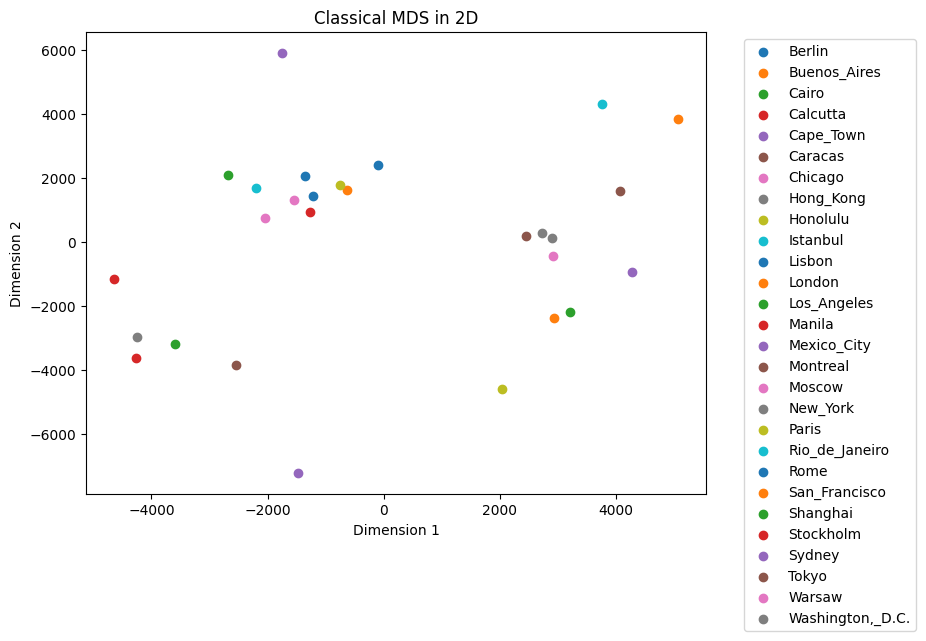

In [118]:
# Plot for 2 dimensions
plt.figure(figsize=(8, 6))

# Scatter plot with labels for each city
for i, city in enumerate(city_names_world):
  plt.scatter(coordinates_2d[i, 0], coordinates_2d[i, 1], label=city)

# Add legend to the right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each point with its city name, uncomment to see the labels on the plot
# for i, city in enumerate(city_names_world):
#   plt.annotate(city, (coordinates_2d[i, 0], coordinates_2d[i, 1]))

plt.title('Classical MDS in 2D')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

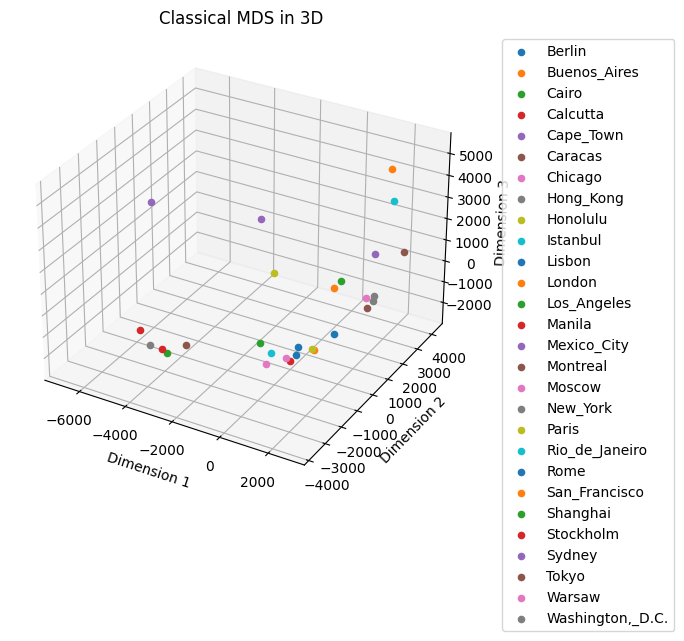

In [119]:
# Plot for 3 dimensions
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with labels for each city
for i, city in enumerate(city_names_world):
  ax.scatter(coordinates_3d[i, 0], coordinates_3d[i, 1], coordinates_3d[i, 2], label=city)

# Add legend to the right of the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each point with its city name, uncomment to see the labels on the plot
# for i, city in enumerate(city_names_world):
#   ax.text(coordinates_3d[i, 0], coordinates_3d[i, 1], coordinates_3d[i, 2], city)

ax.set_title('Classical MDS in 3D')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.show()

## 4.Β

In [120]:
# Perform MDS for d dimensions
d = 28
mds_d = MDS(n_components=d, dissimilarity='precomputed', random_state=random_seed)
coordinates_d = mds_d.fit_transform(distance_matrix) # this is the matrix Y, dimension Nxd

# Calculate eighenvalues
Y = coordinates_d
YY_T = np.dot(coordinates_d, coordinates_d.T)
eigenvalues, _ = np.linalg.eigh(YY_T) # YY^T, dimension NxN

In [121]:
# eigh is used if matrix is symmetric
is_symmetric = np.allclose(YY_T, YY_T.T)
print("YY_T is symmetric:", is_symmetric)

YY_T is symmetric: True


In [122]:
# Sort eighenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
print(f"Eigenvalues in descending order are:\n{sorted_eigenvalues}")

Eigenvalues in descending order are:
[2.35339829e+08 1.49210123e+08 8.72224859e+07 8.22874169e+02
 1.94654247e+02 1.23265854e+02 9.77572478e+01 6.72743515e+01
 4.76622519e+01 3.69978891e+01 2.79501668e+01 2.21469855e+01
 1.87263739e+01 9.26629997e+00 7.30275555e+00 6.21958120e+00
 5.12332114e+00 2.47172740e+00 2.08258801e+00 1.84230280e+00
 1.76600162e+00 9.55298721e-01 8.36909205e-01 4.67327954e-01
 2.80091738e-01 6.03792481e-02 4.13042424e-02 3.31307673e-09]


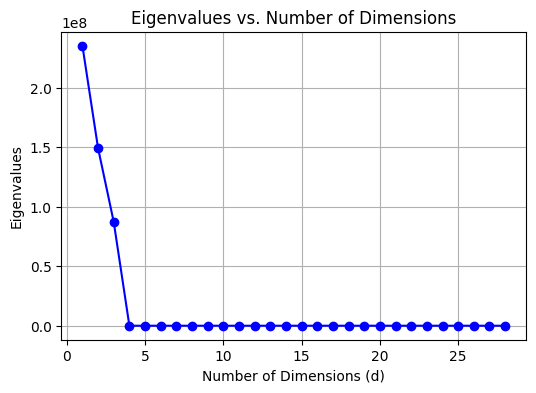

In [123]:
# Number of dimensions (d)
dimensions = np.arange(1, len(sorted_eigenvalues) + 1) # d = 1, 2,3, ..., 28

# Plotting eigenvalues vs. number of dimensions
plt.figure(figsize=(6, 4))
plt.plot(dimensions, sorted_eigenvalues, marker='o', linestyle='-', color='b')
plt.title('Eigenvalues vs. Number of Dimensions')
plt.xlabel('Number of Dimensions (d)')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

In [124]:
dimensions = range(1, distance_matrix.shape[0] + 1) # 1 το 28

stress_values = []

for n_components in dimensions:
  mds = MDS(n_components=n_components, dissimilarity='precomputed')
  X_transformed = mds.fit_transform(distance_matrix)

  # Use stress to evaluate the quality of the representation and choose the optimal number of dimensions
  stress = mds.stress_
  stress_values.append(stress)

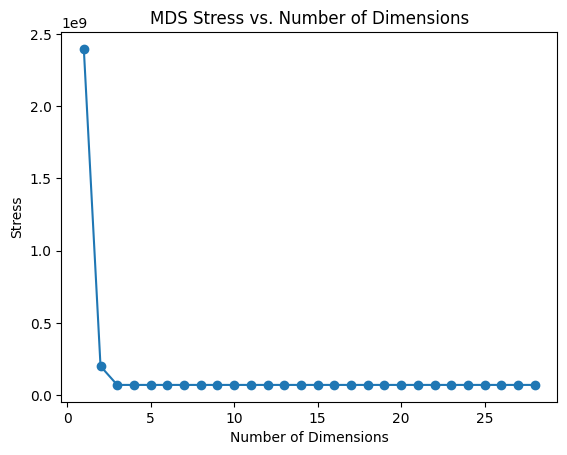

In [125]:
# Plotting the stress values for different dimensions
plt.plot(dimensions, stress_values, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Stress')
plt.title('MDS Stress vs. Number of Dimensions')
plt.show()

## Bonus

In [126]:
# Read names from txt file
with open("City_names_US.txt", "r") as names_file:
  city_names_us = names_file.read().splitlines()
city_names_us

['Birmingham',
 'Boston',
 'Buffalo',
 'Chicago',
 'Cleveland',
 'Dallas',
 'Denver',
 'Detroit',
 'El_Paso',
 'Houston',
 'Indianapolis',
 'Kansas City',
 'LosAngeles',
 'Louisville',
 'Memphis',
 'Miami',
 'Minneapolis',
 'New Orleans',
 'New_York',
 'Omaha',
 'Philadelphia',
 'Phoenix',
 'Pittsburgh',
 'St_Louis',
 'Salt_Lake City',
 'San_Francisco',
 'Seattle',
 'Washington']

In [127]:
# Read the data into a dataframe, handling variable separators
df = pd.read_csv("Distance_Matrix_US.txt", delim_whitespace=True, header=None)
# Set the city_names_world as both row and column names
df.columns = df.index = city_names_us

In [128]:
# df

In [129]:
# Convert pandas dataframe to numpy array
distance_matrix = df.to_numpy()

In [130]:
# Perform MDS for d dimensions
d = 28
mds_d = MDS(n_components=d, dissimilarity='precomputed', random_state=random_seed)
coordinates_d = mds_d.fit_transform(distance_matrix) # this is the matrix Y, dimension Nxd

# Calculate eighenvalues
Y = coordinates_d
YY_T = np.dot(coordinates_d, coordinates_d.T)
eigenvalues, _ = np.linalg.eigh(YY_T) # YY^T, dimension NxN

In [131]:
# eigh is used if matrix is symmetric
is_symmetric = np.allclose(YY_T, YY_T.T)
print("YY_T is symmetric:", is_symmetric)

YY_T is symmetric: True


In [132]:
# Sort eighenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
print(f"Eigenvalues in descending order are:\n{sorted_eigenvalues}")

Eigenvalues in descending order are:
[1.62434992e+07 3.57768729e+06 5.90520338e+04 2.43261678e+04
 9.53948520e+03 5.71211995e+03 3.12757931e+03 2.34385697e+03
 1.63236373e+03 1.30533171e+03 1.12127392e+03 9.10334900e+02
 6.59680520e+02 5.62432780e+02 4.98803812e+02 2.90635529e+02
 2.20258588e+02 1.91450588e+02 1.50435810e+02 9.89658605e+01
 7.45139032e+01 6.62899394e+01 3.16958279e+01 2.37040556e+01
 1.03148115e+01 5.95971261e+00 1.61134891e+00 1.03113860e-10]


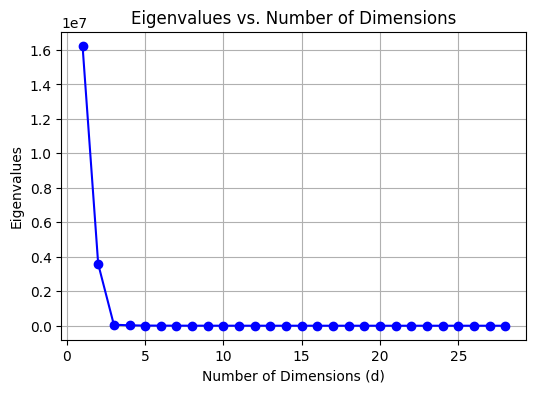

In [133]:
# Number of dimensions (d)
dimensions = np.arange(1, len(sorted_eigenvalues) + 1)

# Plotting eigenvalues vs. number of dimensions
plt.figure(figsize=(6, 4))
plt.plot(dimensions, sorted_eigenvalues, marker='o', linestyle='-', color='b')
plt.title('Eigenvalues vs. Number of Dimensions')
plt.xlabel('Number of Dimensions (d)')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

In [134]:
# Perform MDS for 2 dimensions
mds_2d = MDS(n_components=2, dissimilarity='precomputed', random_state=random_seed)
coordinates_2d = mds_2d.fit_transform(distance_matrix)

# Perform MDS for 3 dimensions
mds_3d = MDS(n_components=3, dissimilarity='precomputed', random_state=random_seed)
coordinates_3d = mds_3d.fit_transform(distance_matrix)

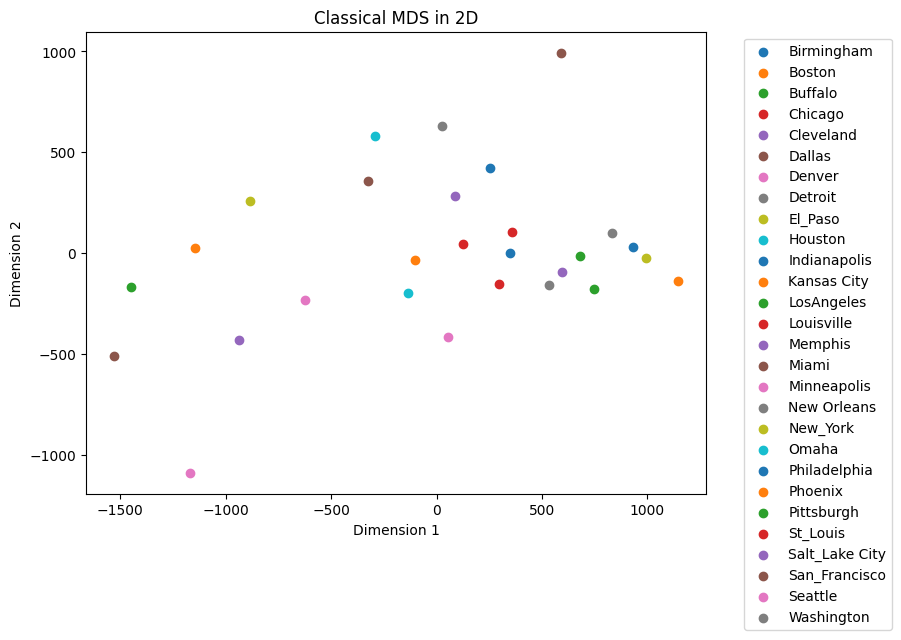

In [135]:
# Plot for 2 dimensions
plt.figure(figsize=(8, 6))

# Scatter plot with labels for each city
for i, city in enumerate(city_names_us):
  plt.scatter(coordinates_2d[i, 0], coordinates_2d[i, 1], label=city)

# Add legend to the right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each point with its city name, uncomment to see the labels on the plot
# for i, city in enumerate(city_names_world):
#   plt.annotate(city, (coordinates_2d[i, 0], coordinates_2d[i, 1]))

plt.title('Classical MDS in 2D')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

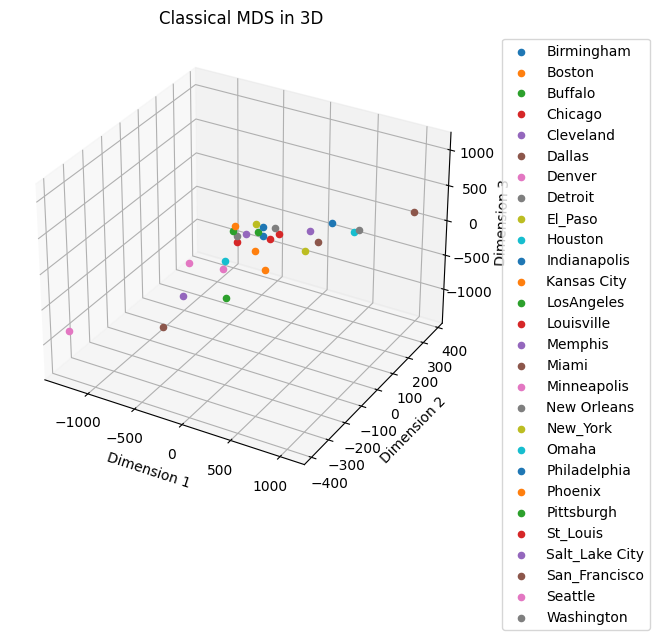

In [136]:
# Plot for 3 dimensions
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with labels for each city
for i, city in enumerate(city_names_us):
  ax.scatter(coordinates_3d[i, 0], coordinates_3d[i, 1], coordinates_3d[i, 2], label=city)

# Add legend to the right of the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each point with its city name, uncomment to see the labels on the plot
# for i, city in enumerate(city_names_world):
#   ax.text(coordinates_3d[i, 0], coordinates_3d[i, 1], coordinates_3d[i, 2], city)

ax.set_title('Classical MDS in 3D')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.show()